In [ ]:
tfrec = 'tfrecs/2022/20220828/goes16_20220828-200100_Y1010_X530.tfrec'

raw_dataset = tf.data.TFRecordDataset(tfrec)
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(1):

  fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
  for ii,ax in enumerate(axes.ravel()):
    ax.axis('off')
    if(ii==0):
      im = ax.imshow(unbytescale(features['CH02'].numpy(), bsinfo['CH02']['vmin'], bsinfo['CH02']['vmax']), interpolation='none', cmap=plt.get_cmap('Greys_r'))
      #plt.colorbar(im,ax=ax,orientation='horizontal',pad=0.03)
      ax.set_title('CH02 reflectance')
    elif(ii==1):
      im = ax.imshow(unbytescale(features['CH13'].numpy(), bsinfo['CH13']['vmin'], bsinfo['CH13']['vmax']), interpolation='none', cmap=plt.get_cmap('inferno_r'))
      ax.set_title('CH13 brightness temperature')
    elif(ii==2):
      im = ax.imshow(unbytescale(features['CH05'].numpy(), bsinfo['CH05']['vmin'], bsinfo['CH05']['vmax']), interpolation='none', cmap=plt.get_cmap('Greys_r'))
      ax.set_title('CH05 reflectance')
    else:
      ax.imshow(features['FED_accum_60min_2km'].numpy(), interpolation='none')
      ax.set_title('Flash-extent density 60-min accumulation')

  plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
ch2 = np.load("./dataset/2022/20220828/CH02_20220828-202100_Y1010_X530.npy")
ch5 = np.load("./dataset/2022/20220828/CH05_20220828-202100_Y1010_X530.npy")
ch13 = np.load("./dataset/2022/20220828/CH13_20220828-202100_Y1010_X530.npy")
FED = np.load("./dataset/2022/20220828/FED_20220828-205600_Y1010_X530.npy")

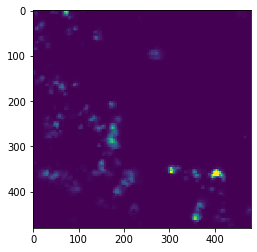

In [33]:
plt.imshow(ch2[:,:,0], interpolation='none', cmap='gray')
plt.imshow(ch13[:,:,0], interpolation='none', cmap='plasma_r')
plt.imshow(ch5[:,:,0], interpolation='none', cmap='gray')
plt.imshow(FED[:,:,0], interpolation='none')

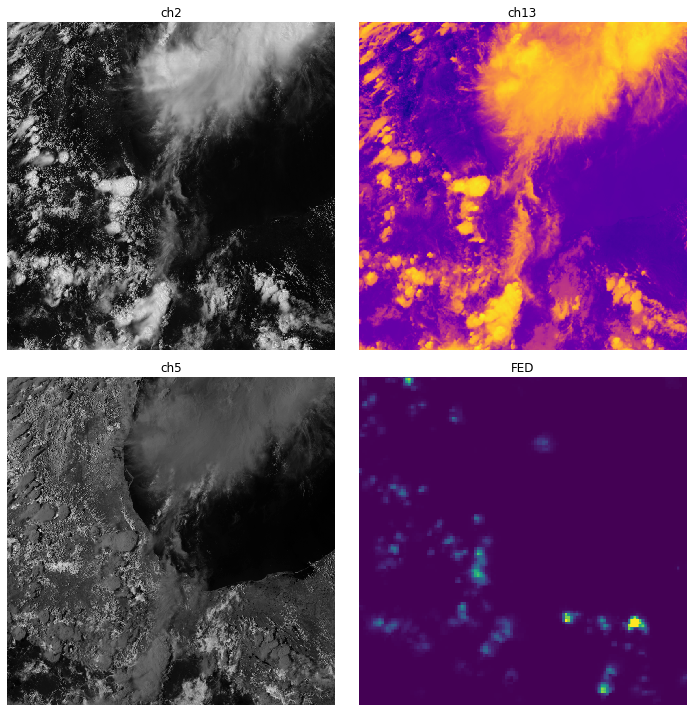

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# First image
axes[0, 0].imshow(ch2[:, :, 0], interpolation='none', cmap='gray')
axes[0, 0].set_title('ch2')
axes[0, 0].axis('off')

# Second image
axes[0, 1].imshow(ch13[:, :, 0], interpolation='none', cmap='plasma_r')
axes[0, 1].set_title('ch13')
axes[0, 1].axis('off')

# Third image
axes[1, 0].imshow(ch5[:, :, 0], interpolation='none', cmap='gray')
axes[1, 0].set_title('ch5')
axes[1, 0].axis('off')

# Fourth image
axes[1, 1].imshow(FED[:, :, 0], interpolation='none')
axes[1, 1].set_title('FED')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [34]:
ch02 =ch2

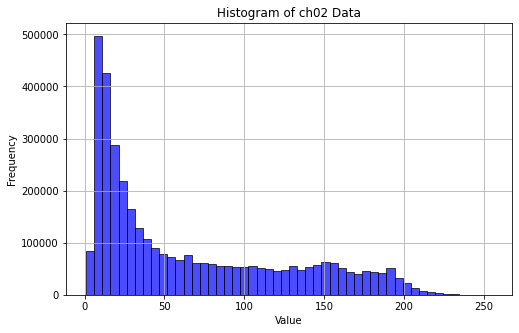

In [35]:
ch02_flat = ch02.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.hist(ch02_flat, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of ch02 Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()